### Вводная часть
Приложение **Procrastinate Pro+** несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 
Цель — разобраться в причинах и помочь компании выйти в плюс.

Задача - ответить на следующие вопросы:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

### Загрузите данные и подготовьте их к анализу

In [1]:
#Импортируем библиотеки

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

In [2]:
try:
    visits_info = pd.read_csv('/datasets/visits_info_short.csv')
    orders_info = pd.read_csv('/datasets/orders_info_short.csv')
    costs_info = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits_info = pd.read_csv('здесь была ссылка на датасет')
    orders_info = pd.read_csv('здесь была ссылка на датасет')
    costs_info = pd.read_csv('здесь была ссылка на датасет')

display(visits_info.head())
display(orders_info.head())
display(costs_info.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [3]:
visits_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
orders_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [5]:
costs_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Перебираем таблицу с визитами

In [6]:
print(visits_info.isnull().sum())

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


In [7]:
print(visits_info.duplicated().sum())

0


In [8]:
visits_info.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [9]:
visits_info['session_start'] = pd.to_datetime(visits_info['session_start'])
visits_info['session_end'] = pd.to_datetime(visits_info['session_end'])
visits_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


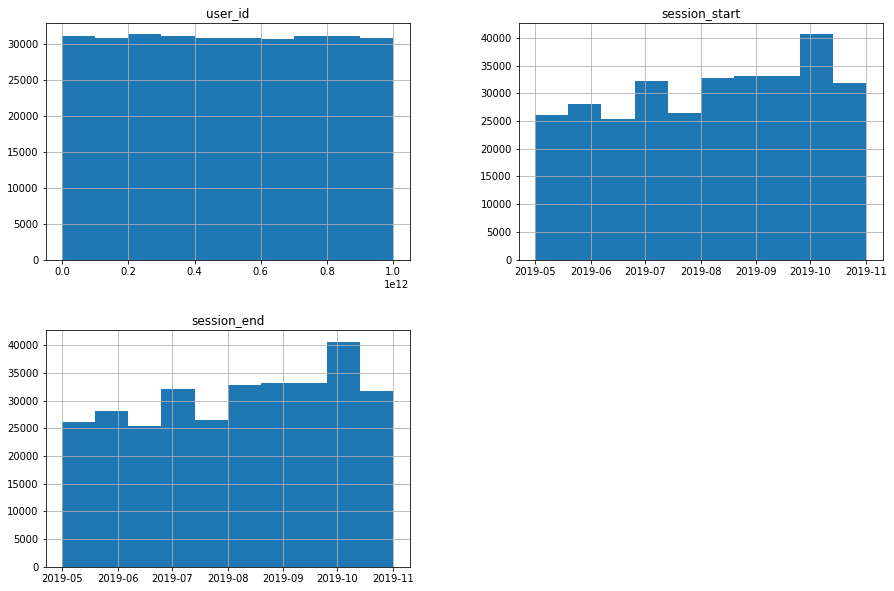

In [10]:
visits_info.hist(figsize=(15, 10));

Перебираем таблицу с заказами

In [11]:
print(orders_info.isnull().sum())

User Id     0
Event Dt    0
Revenue     0
dtype: int64


In [12]:
print(visits_info.duplicated().sum())

0


In [13]:
orders_info.columns = ['user_id', 'event_dt', 'revenue']

In [14]:
orders_info['event_dt'] = pd.to_datetime(orders_info['event_dt'])
orders_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


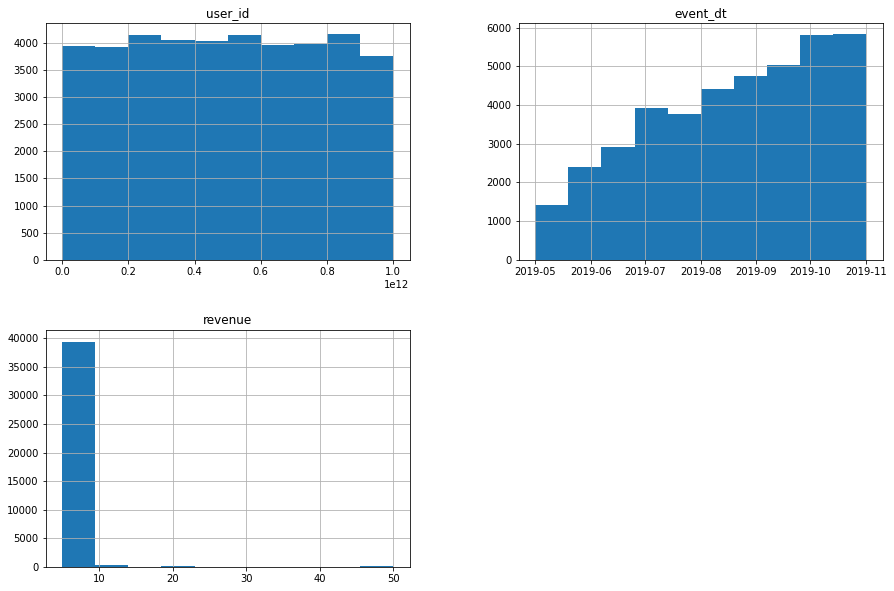

In [15]:
orders_info.hist(figsize=(15, 10));

Перебираем таблицу с посещениями

In [16]:
print(costs_info.isnull().sum())

dt         0
Channel    0
costs      0
dtype: int64


In [17]:
print(costs_info.duplicated().sum())

0


In [18]:
costs_info.columns = ['dt', 'channel', 'costs']

In [19]:
costs_info['dt'] = pd.to_datetime(costs_info['dt']).dt.date
costs_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


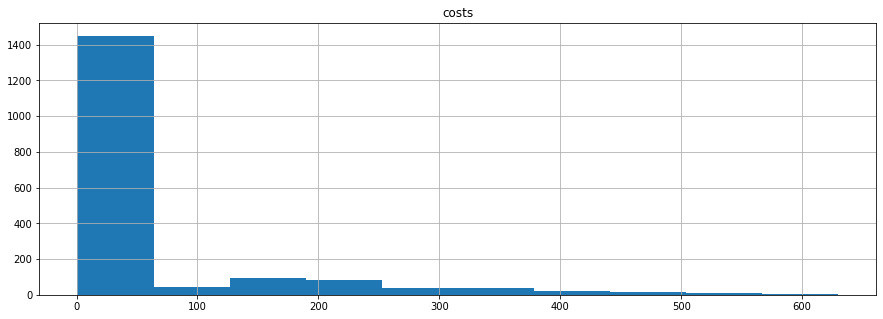

In [20]:
costs_info.hist(figsize=(15, 5));

В целом, набор данных выглядит весьма приятно, пропусков и полных дубликатов не обнаруженно.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [21]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):
    # Шаг 1. Передадим в функцию расчета профиля данные о рекламных затратах (фрейм ad_costs)
    
    # сортируем сессии по id пользователя и дате для того,чтобы работал first
    # находим первые значения для параметров пользователя - будем считать их основными 
    profiles = (sessions.sort_values(by = ['user_id', 'session_start'])           
                        .groupby('user_id').agg({'session_start' : 'first',       
                                                 'channel': 'first',
                                                 'device': 'first',
                                                 'region': 'first'})                                 
                        .rename(columns = {'session_start' : 'first_ts'})  
                        .reset_index()  # вернем все данные из индекса в колонки                                           
               )
    # определим дату первого посещеня 
    # и начало месяца первого посещения - они понадобятся нам при когортном анализе
    profiles['dt'] = profiles['first_ts'].dt.date                                 
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')     
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())   
            
    # Шаг 2. К данным о рекламных затратах добавим количества привлеченных пользователей
    new_users = profiles.groupby(['dt', 'channel']).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'unique_users'}).reset_index()
    ad_costs = ad_costs.merge(new_users, on = ['dt', 'channel'], how = 'left')
    
    # Шаг 3. Найдем среднюю стоимость привлечения пользователя
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # Шаг 4. Присоединим данные к профилям пользователей информацию о средней стоимости привлечения в день привлечения пользователя из нужного источника
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on = ['dt', 'channel'], how = 'left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0) # органические пользователи будут стоить 0
    
    return profiles

In [22]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа 
    # тех, которые присоединились позже, чем observation_date - horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим «треугольную таблицу» 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к «треугольной» таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждую «ячейку» на соответствующий размер когорты и получаем retention rate
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # исключаем все лайфтаймы, превышающие горизонт анализа
        result['cohort_size'] = cohort_sizes                                                                     # восстанавливаем размеры когорт
        return result
    
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем обе таблицы и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped, result_in_time


In [23]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [24]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [25]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [26]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [27]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [28]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [29]:
profiles = get_profiles(visits_info, orders_info, costs_info)
display(profiles.head(5)) 



,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [30]:
print(f'Минимальная дата привлечения: {profiles["dt"].min()}')
print(f'Максимальная дата привлечения: {profiles["dt"].max()}')

Минимальная дата привлечения: 2019-05-01
Максимальная дата привлечения: 2019-10-27


In [31]:
observation_date = pd.datetime(2019, 10, 27).date()  # момент анализа
horizon_days = 7  # горизонт анализа 

/tmp/ipykernel_230/656825866.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  observation_date = pd.datetime(2019, 10, 27).date()  # момент анализа


**Проверим данные в разрезе стран, платформ, и каналов продвижения.**

In [32]:
country_table = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'sum'})
country_table.columns = ['users', 'sum']
country_table['payers_rate'] = country_table['sum'] / country_table['users'] 
display(country_table.sort_values(by='payers_rate', ascending=False)) 

,users,sum,payers_rate
region,,,
United States,100002,6902,0.069019
Germany,14981,616,0.041119
UK,17575,700,0.039829
France,17450,663,0.037994


В разрезе по странам наблюдается серьезный разрыв между США и остальными странами, то же наблюдается и в отношении конверсии в платящих пользователей. На данный момент сложно сказать насколько хорош покзатель конверсии, дождемся показателя ROI.

In [33]:
devices_table = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'})
devices_table.columns = ['users', 'sum']
devices_table['payers_rate'] = devices_table['sum'] / devices_table['users'] 
display(devices_table.sort_values(by='payers_rate', ascending=False)) 

,users,sum,payers_rate
device,,,
Mac,30042,1912,0.063644
iPhone,54479,3382,0.062079
Android,35032,2050,0.058518
PC,30455,1537,0.050468


В разрезе платформ "Яблочники" оказваются более склонными к конверсии, в целом как оно наблюдалось  по прочим учебным кейсам. "ПК-бояре" традиционо представляют собой более холодную аудиторию.

In [34]:
channels_table = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'})
channels_table.columns = ['users', 'sum']
channels_table['payers_rate'] = channels_table['sum'] / channels_table['users'] 
display(channels_table.sort_values(by='payers_rate', ascending=False)) 

,users,sum,payers_rate
channel,,,
FaceBoom,29144,3557,0.122049
AdNonSense,3880,440,0.113402
lambdaMediaAds,2149,225,0.104700
TipTop,19561,1878,0.096007
RocketSuperAds,4448,352,0.079137
WahooNetBanner,8553,453,0.052964
YRabbit,4312,165,0.038265
MediaTornado,4364,156,0.035747
LeapBob,8553,262,0.030633


Наиболее конверсионными каналами стали: FaceBoom, AdNonSense и lambdaMediaAds. Однако наиболее многочисленным каналом привлечения пользователей стал органический траффик, правда с самой маленькой конверсией. Ну и ладно, даренному коню в зубы не смотрят.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [35]:
print(f'Стоимость рекламной компании составила: {costs_info["costs"].sum().round(1)}$')

Стоимость рекламной компании составила: 105497.3$


Посмотрим на распределение затрат по источникам.

In [36]:
costs_grouped = costs_info.pivot_table(
    index='channel', values='costs', aggfunc= 'sum'
).sort_values(by='costs', ascending=False)

display(costs_grouped)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


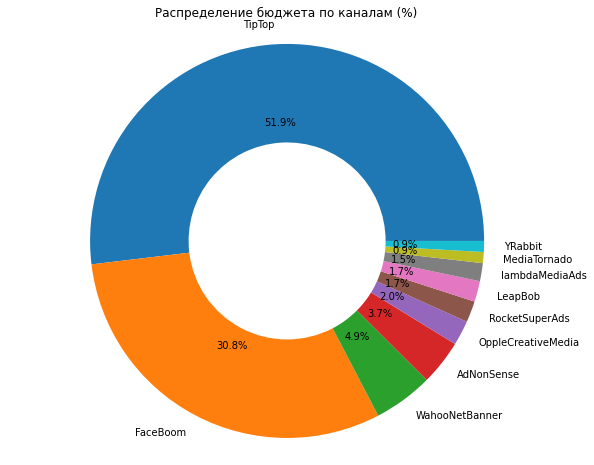

In [37]:
labels = ['TipTop', 'FaceBoom', 'WahooNetBanner', 'AdNonSense', 'OppleCreativeMedia', 'RocketSuperAds', 'LeapBob', 'lambdaMediaAds', 'MediaTornado', 'YRabbit']
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Распределение бюджета по каналам (%)')
ax.pie(costs_grouped['costs'], labels=labels, wedgeprops=dict(width=0.5), autopct='%1.1f%%')
ax.axis("equal");

Добавим конверсию к источникам:

In [38]:
costs_grouped_m = costs_grouped.merge(
    channels_table, left_index=True, right_index=True)
display(costs_grouped_m)

,costs,users,sum,payers_rate
channel,,,,
TipTop,54751.30,19561,1878,0.096007
FaceBoom,32445.60,29144,3557,0.122049
WahooNetBanner,5151.00,8553,453,0.052964
AdNonSense,3911.25,3880,440,0.113402
OppleCreativeMedia,2151.25,8605,233,0.027077
RocketSuperAds,1833.00,4448,352,0.079137
LeapBob,1797.60,8553,262,0.030633
lambdaMediaAds,1557.60,2149,225,0.104700
MediaTornado,954.48,4364,156,0.035747


Проанализировав структуру бюджета мы видим первый тревожный звонок - 4 по эффективности конверсии источник "съел" половину бюджета рекламной компании.

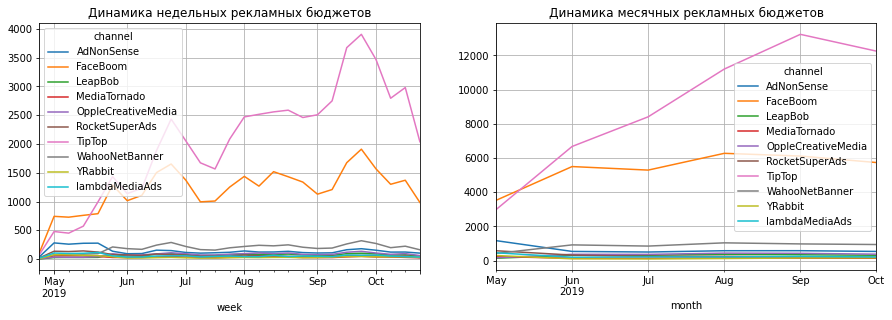

In [39]:
raw_costs = costs_info
raw_costs['week'] = raw_costs['dt'].astype('datetime64[W]')
raw_costs['month'] = raw_costs['dt'].astype('datetime64[M]')

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(2, 2, 1)

plt.title('Динамика недельных рекламных бюджетов')
plt.xlabel('Неделя')

ax2 = plt.subplot(2, 2, 2)    
plt.xlabel('Месяц')
plt.title('Динамика месячных рекламных бюджетов')
ax2.grid(b=True, which='minor', axis='both', linestyle='-')

raw_costs.pivot_table(
    index='week', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, ax=ax1);

raw_costs.pivot_table(
    index='month', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, ax=ax2);


**Изучив динамику рекламных бюджетов можно отметить следующее.**

1. Большая часть каналов по тратам бюджета в целом не терпела корректировок за всю рекламную компанию.
2. TipTop в ходе рекламной кампании имел регулярную подкачку бюджета
3. Вероятнее всего, в ходе рекламной компании не проводилась текущая оценка показателей эффективности рекламных каналов и не принимались соответсвующие решения о корректировке рекламных бюджетов по каналам.
4. Возможно, в TipTop выделяли бюджет потому что "это стильно-модно-молодежная площадка, полюбому окупится, там все сидят сейчас". Покрайней мере канал не анализировался за полугодовую рекламную кампанию.
5. Проверив САС мы увидим, что по этим каналам показатель будет высоким, что может угробить окупаемость этих каналов.


**Смотрим САС**

In [40]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles, orders_info, datetime(2019,11,1).date(), 14, dimensions=['channel']
)
display(roi_grouped.sort_values(by='cac', ascending=False))

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
TipTop,18498,2.757774,0.124575,0.180359,0.226321,0.268272,0.305449,0.339298,0.367570,0.397585,0.424763,0.451627,0.475535,0.497310,0.517679,0.539532
FaceBoom,27544,1.113419,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790
AdNonSense,3702,1.008023,0.501010,0.584460,0.639288,0.678069,0.701069,0.726752,0.748147,0.761519,0.782922,0.796294,0.800573,0.808597,0.820631,0.831337
lambdaMediaAds,2056,0.727237,0.632899,0.887333,1.070887,1.245178,1.432136,1.595673,1.735841,1.859323,1.986818,2.070251,2.171709,2.241794,2.331922,2.428712
WahooNetBanner,8082,0.601856,0.317853,0.484298,0.629588,0.737309,0.858780,0.946188,1.049868,1.126808,1.205193,1.271878,1.350049,1.411192,1.477881,1.526304
RocketSuperAds,4251,0.417431,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
OppleCreativeMedia,8139,0.249908,0.389100,0.526504,0.686996,0.826849,0.964769,1.065354,1.161037,1.238564,1.314661,1.388265,1.457448,1.507006,1.580649,1.637075
MediaTornado,4167,0.219035,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519
YRabbit,4102,0.217087,0.752238,0.983122,1.179250,1.400049,1.641119,1.786814,1.910094,2.022179,2.123045,2.212703,2.313569,2.414457,2.516446,2.578086


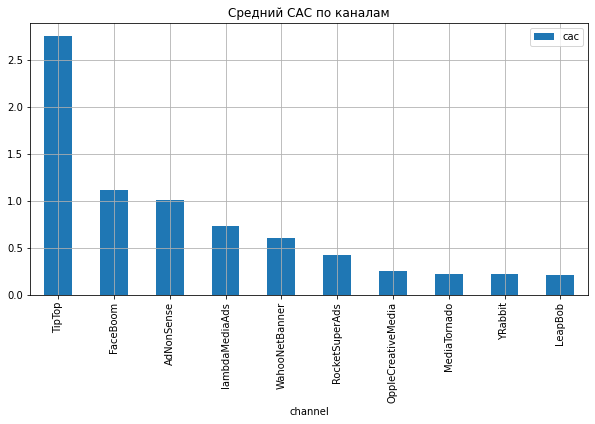

In [41]:
roi_grouped.sort_values(by='cac', ascending=False).plot.bar(y='cac', figsize=(10,5), title='Средний САС по каналам', grid=True);

Выводы из предыдущего пункта подтверждаются: тяжеловесы рекламного бюджета неизбежно имеют более выскоий САС, а показатель Тип Топа совсем выходит за рамки приличия и отрывается от остальных каналов.

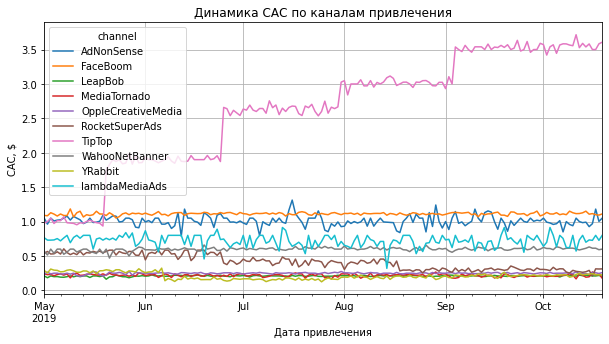

In [42]:
roi_week = roi_in_time.pivot_table(
    index='dt', columns='channel', values='cac', aggfunc='sum'
)

roi_week.plot(grid=True, figsize=(10, 5))

plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()



Собственно, что и требовалось ожидать: на графике можно отчетливо выделить 4 момента, когда поднимался бюджет на ТипТоп, что неизбежно тянет САС вверх. Остальные показатели в целом серьезных изменений не имеют и держатся в рамках своего коридора.

**Итого по анализу маркетинговой кампании:**
1. Большая часть каналов по тратам бюджета в целом не терпела корректировок за всю рекламную компанию.
2. TipTop в ходе рекламной кампании имел регулярную подкачку бюджета.
3. Вероятнее всего, в ходе рекламной компании не проводилась текущая оценка показателей эффективности рекламных каналов и не принимались соответсвующие решения о корректировке рекламных бюджетов по каналам.
4. Входе безконтрольной подкачки рекламного бюджета по каналу ТипТопа, САС данного канала сильно вырос и оторвался от показателей по прочим каналам. 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [43]:
profiles = profiles.query('channel != "organic"')

tot_result_raw, tot_result_grouped, tot_result_in_time, tot_roi_grouped, tot_roi_in_time = get_ltv(
    profiles, orders_info, datetime(2019,11,1).date(), 14, dimensions=[]
)

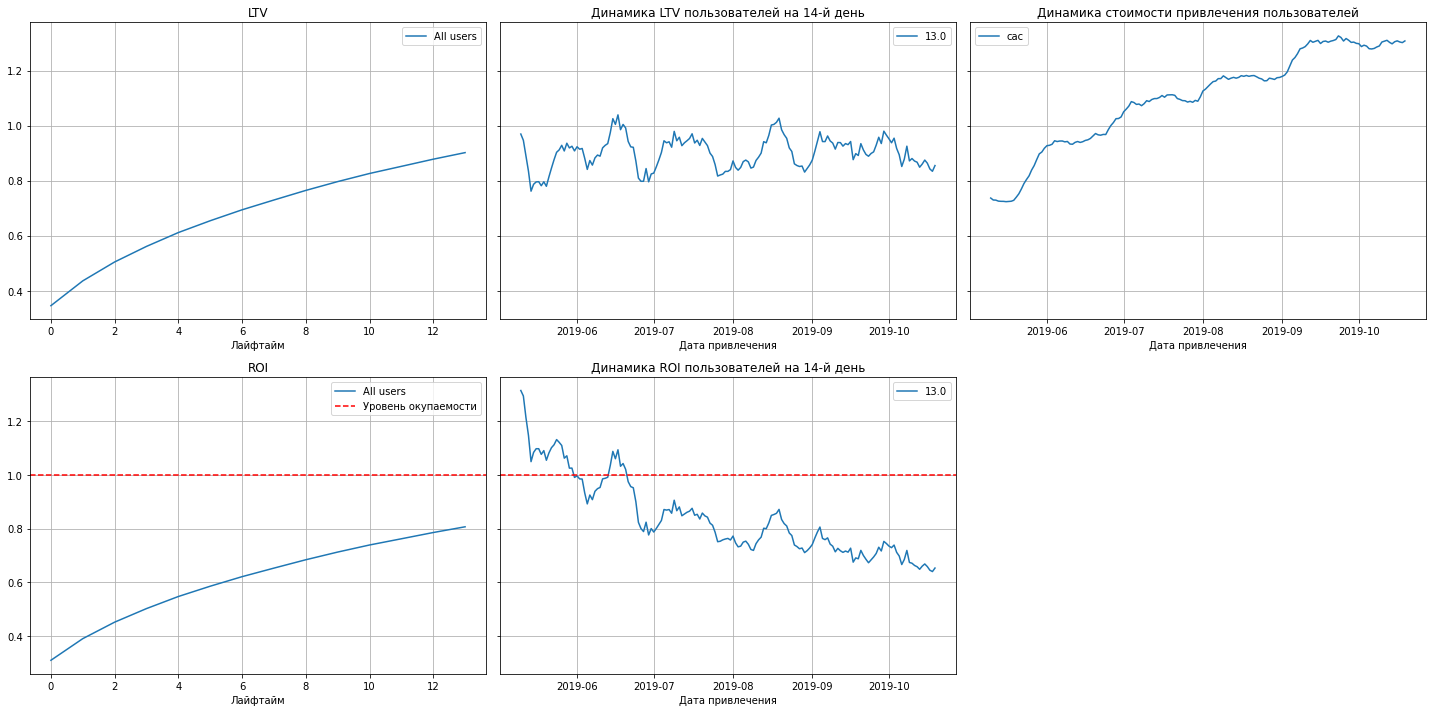

In [44]:
plot_ltv_roi(tot_result_grouped, tot_result_in_time, tot_roi_grouped, tot_roi_in_time, 14, window=10)

Общие показатели рекламной кампании - неутешительны. LTV на отметке 14 дней дает показатель в 0,9$, а окупаемость вложенных денег так и не наступает. Говоря о динамике показателей, мы видим, что увеличение рекламного бюджета привело не только к снижению LTV, но уронило ROI и увеличила САС.

In [45]:
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles, visits_info, datetime(2019, 11, 1).date(), 14)

**Начинаем детально препарировать рекламную кампанию**

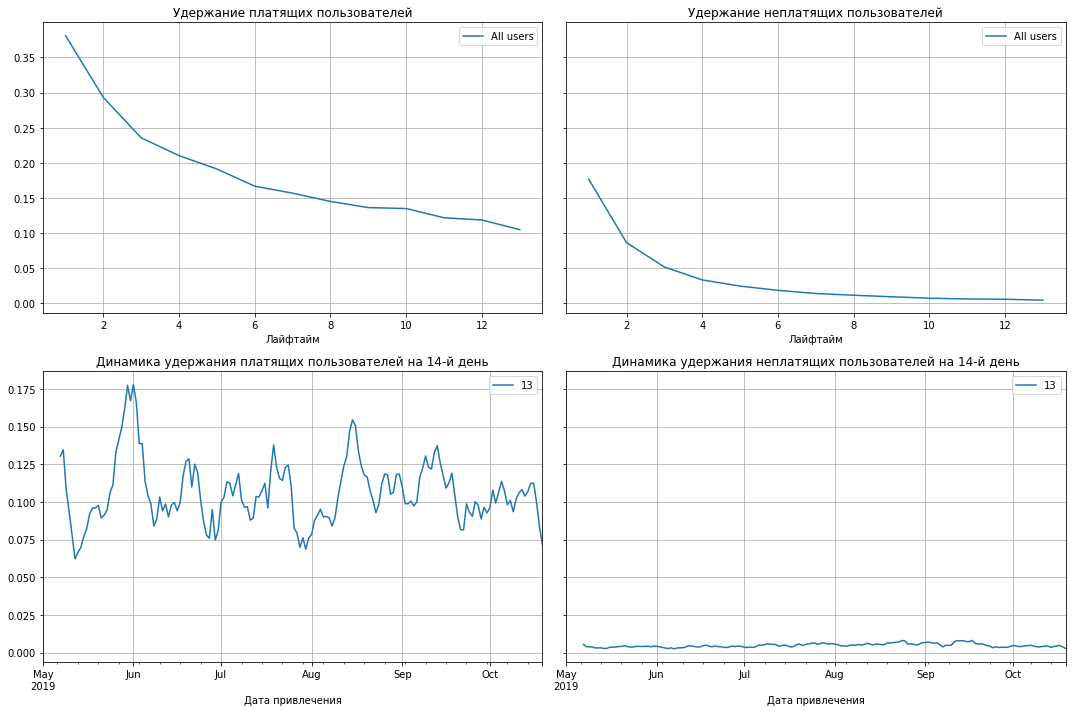

In [46]:
plot_retention(retention_grouped, retention_in_time, 14, window=7)

Тут все выглятит логично: платящие пользователи значительно более вовлечены в приложение, однако к 14 дню коэфициент обваливается ~0.12 и в целом наблюдается  вялый тренд снижения динамики удержания. Неплатящие стремятся к нулю.

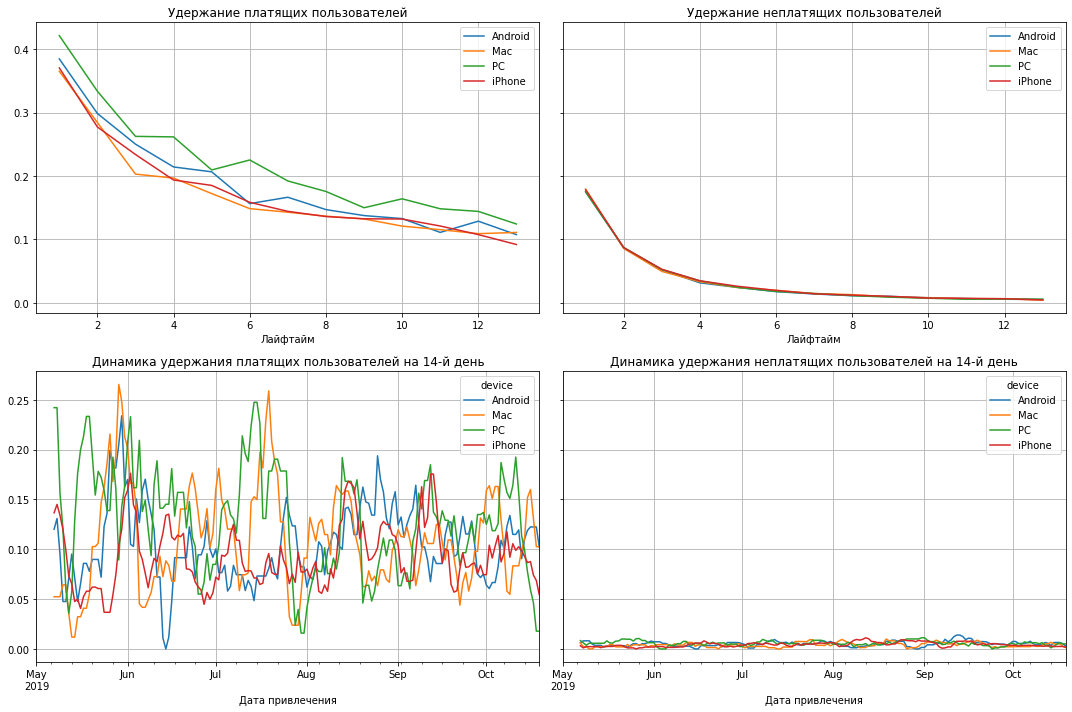

In [47]:
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles, visits_info, datetime(2019, 11, 1).date(), 14, dimensions=['device'],
    ignore_horizon=False,)
plot_retention(retention_grouped, retention_in_time, 14, window=7)

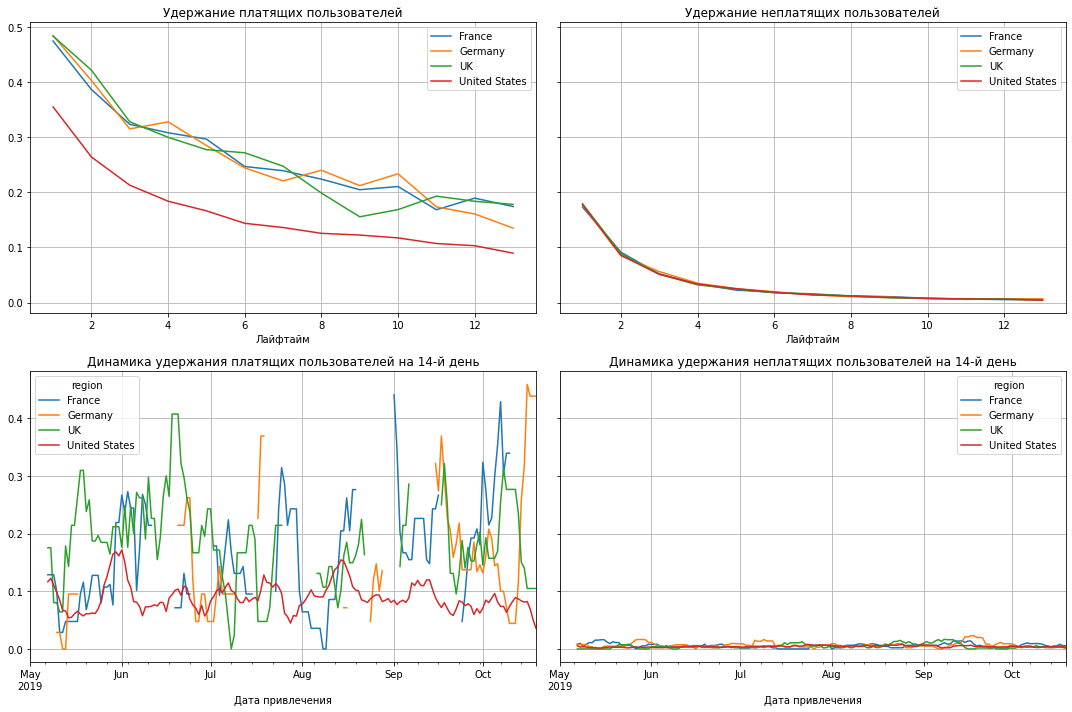

In [48]:
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles, visits_info, datetime(2019, 11, 1).date(), 14, dimensions=['region'],
    ignore_horizon=False,)
plot_retention(retention_grouped, retention_in_time, 14, window=7)

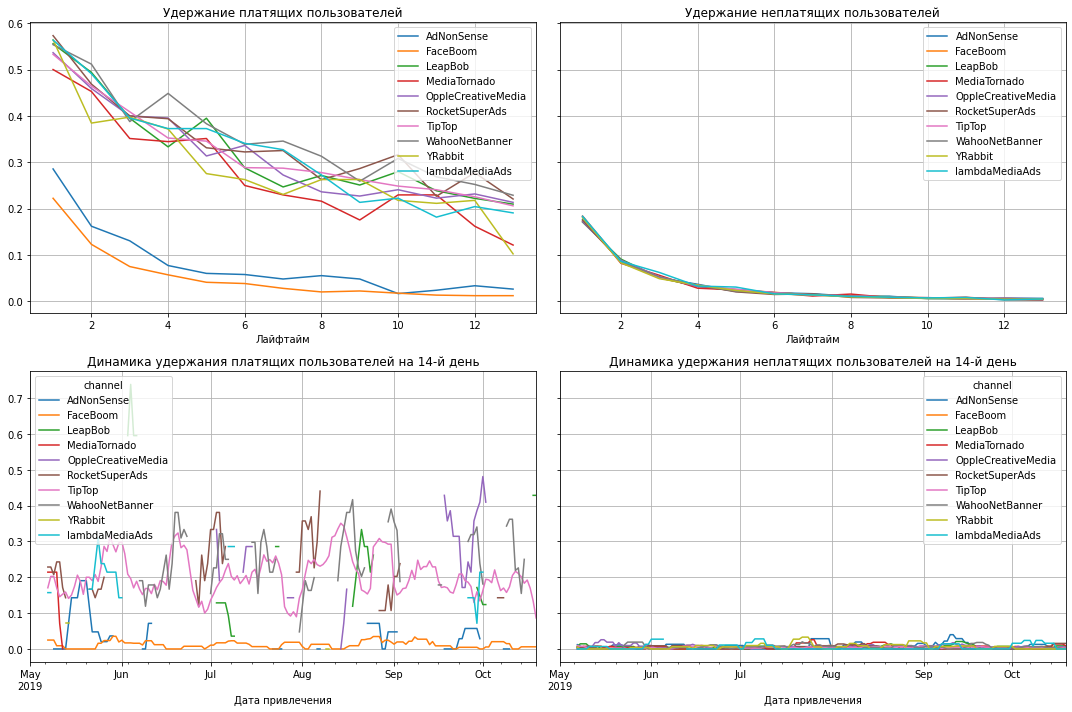

In [49]:
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles, visits_info, datetime(2019, 11, 1).date(), 14, dimensions=['channel'],
    ignore_horizon=False,)
plot_retention(retention_grouped, retention_in_time, 14, window=7)

**Краткий итог по удержанию:**
1. Удержание ПК-пользователей лучше - из офиса прокрастинировать сподручнее, солдат спит - служба идет.
2. Американский рынок в целом не приветлив для приложения.
3. AdNonSence и FaceBoom хуже остальных справляются с удержанием пользователя.
4. На динамике по регионам и по каналам - рвется график - отсутствуют данные?

In [50]:
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(
    profiles,
    orders_info,
    datetime(2019,11,1).date(), 
    14,      
    dimensions=[],
    ignore_horizon=False,
)

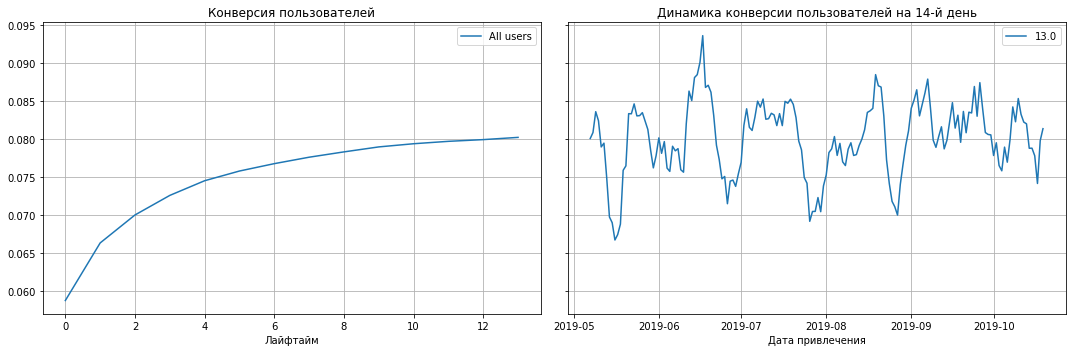

In [51]:
plot_conversion(conversion_grouped, conversion_in_time, 14, window=7)

Конверсия - 8%. Достаточно невысокий показатель.

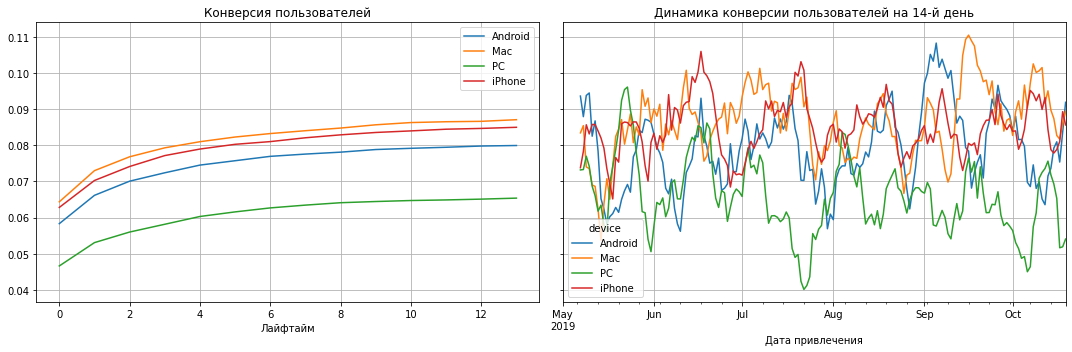

In [52]:
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(
    profiles,
    orders_info,
    datetime(2019,11,1).date(), 
    14,      
    dimensions=['device'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_in_time, 14, window=7)


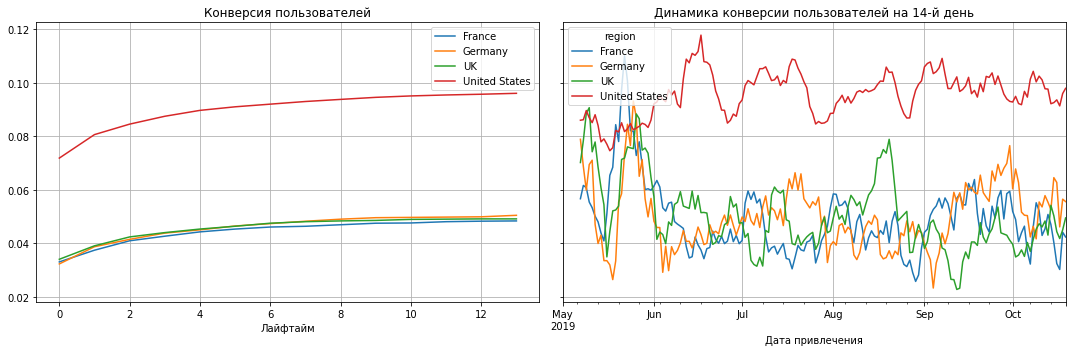

In [53]:
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(
    profiles,
    orders_info,
    datetime(2019,11,1).date(), 
    14,      
    dimensions=['region'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_in_time, 14, window=7)

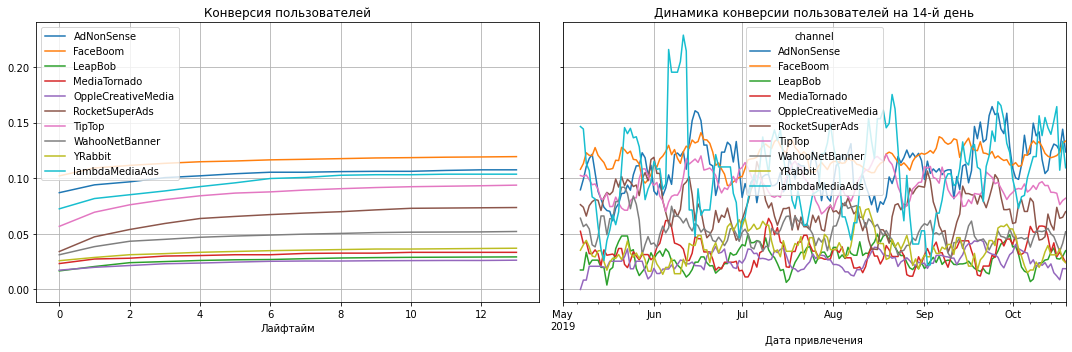

In [54]:
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(
    profiles,
    orders_info,
    datetime(2019,11,1).date(), 
    14,      
    dimensions=['channel'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_in_time, 14, window=7)

**Краткий итог по удержанию:**
1. Общая конверсия находится на отметке 8%, с просадкой динамики во второй половине месяца.
2. Несмотря на то, что яблочники в конечном итоге с финансовой стороны проявят себя не лучшим способом, однако конвертируются они лучше остальных платформ. Для ПК ситуация ровно наоборот.
3. То же самое можно сказать и про США в разрезе регионов.
4. Практически для всех каналов справедлива таже ситуация - дорогие каналы показывают лучшую конверсию.

In [55]:
reg_result_raw, reg_result_grouped, reg_result_in_time, reg_roi_grouped, reg_roi_in_time = get_ltv(
    profiles, orders_info, datetime(2019,11,1).date(), 14, dimensions=['region']
)

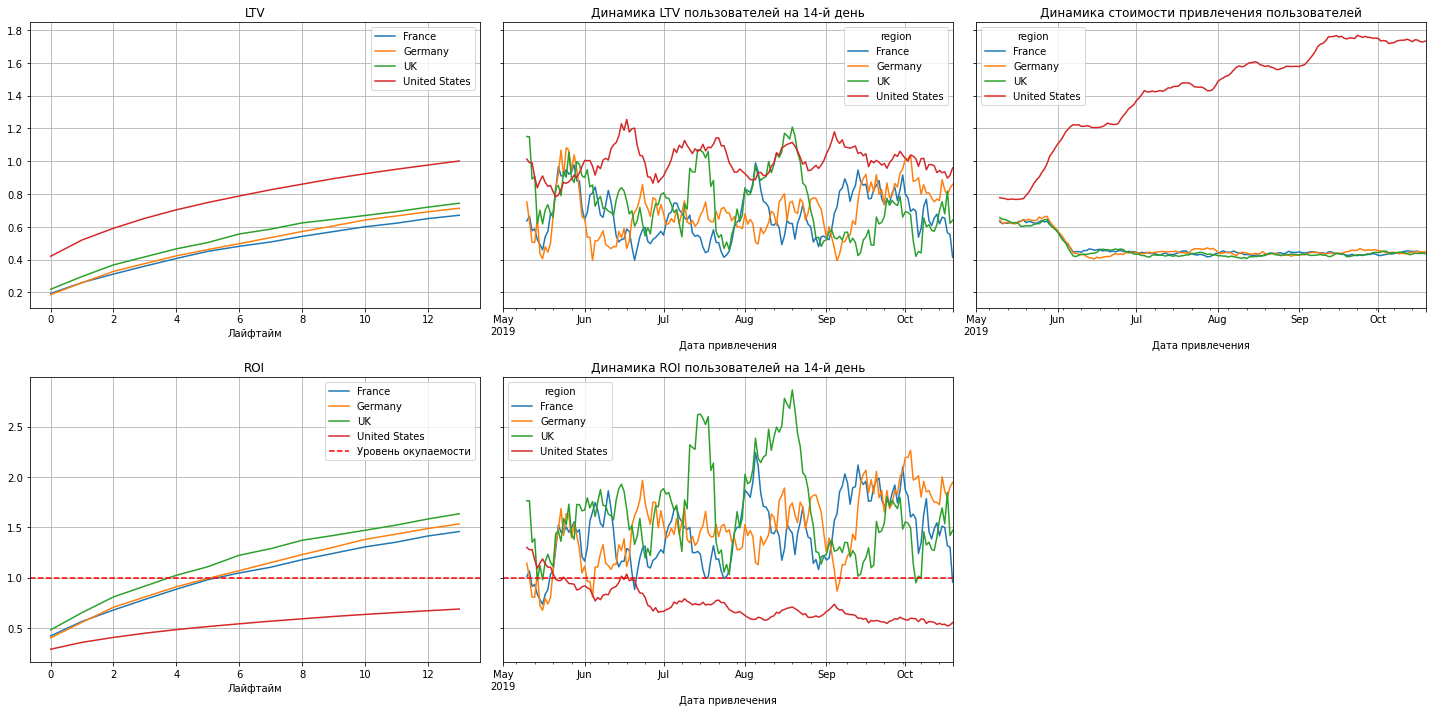

In [56]:
plot_ltv_roi(reg_result_grouped, reg_result_in_time, reg_roi_grouped, reg_roi_in_time, 14, window=10)

Здесь мы можем увидеть одну из причин неудавшейся кампании - настройка рекламы для Америки. Хоть пользователь из Америки и имеет более высокий LTV, однако он обходится крайне дорого на входе. А в связи с тем, что американский сегмент самый крупный, это неизбежно снижает рентабельность всей рекламной кампании.

In [57]:
dev_result_raw, dev_result_grouped, dev_result_in_time, dev_roi_grouped, dev_roi_in_time = get_ltv(
    profiles, orders_info, datetime(2019,11,1).date(), 14, dimensions=['device']
)

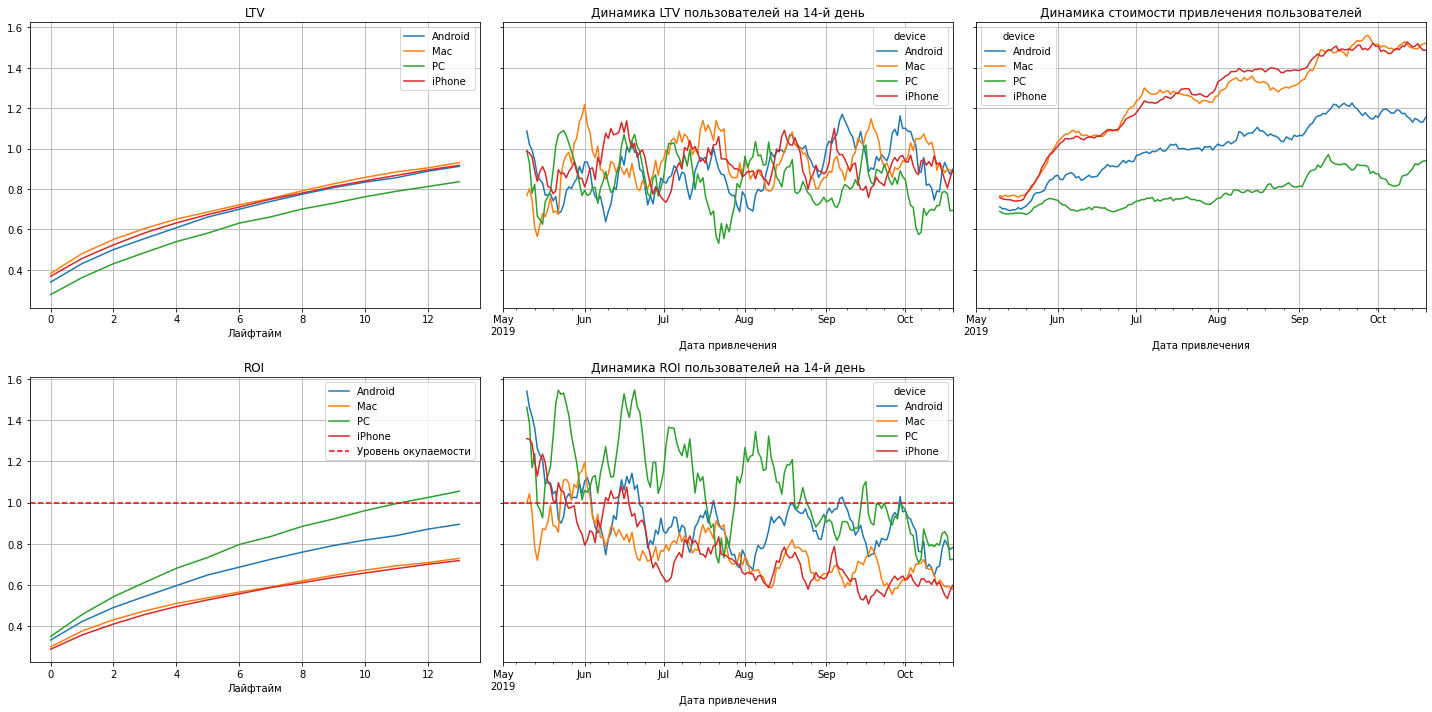

In [58]:
plot_ltv_roi(dev_result_grouped, dev_result_in_time, dev_roi_grouped, dev_roi_in_time, 14, window=10)

В конечном итоге почти все платформы не окупились, особенно"яблочные" платформы. ПК показывает более лучшие результаты, однако, ближе к концу рекламной кампании ROI на 14 день перестает достигать целевого показателя.

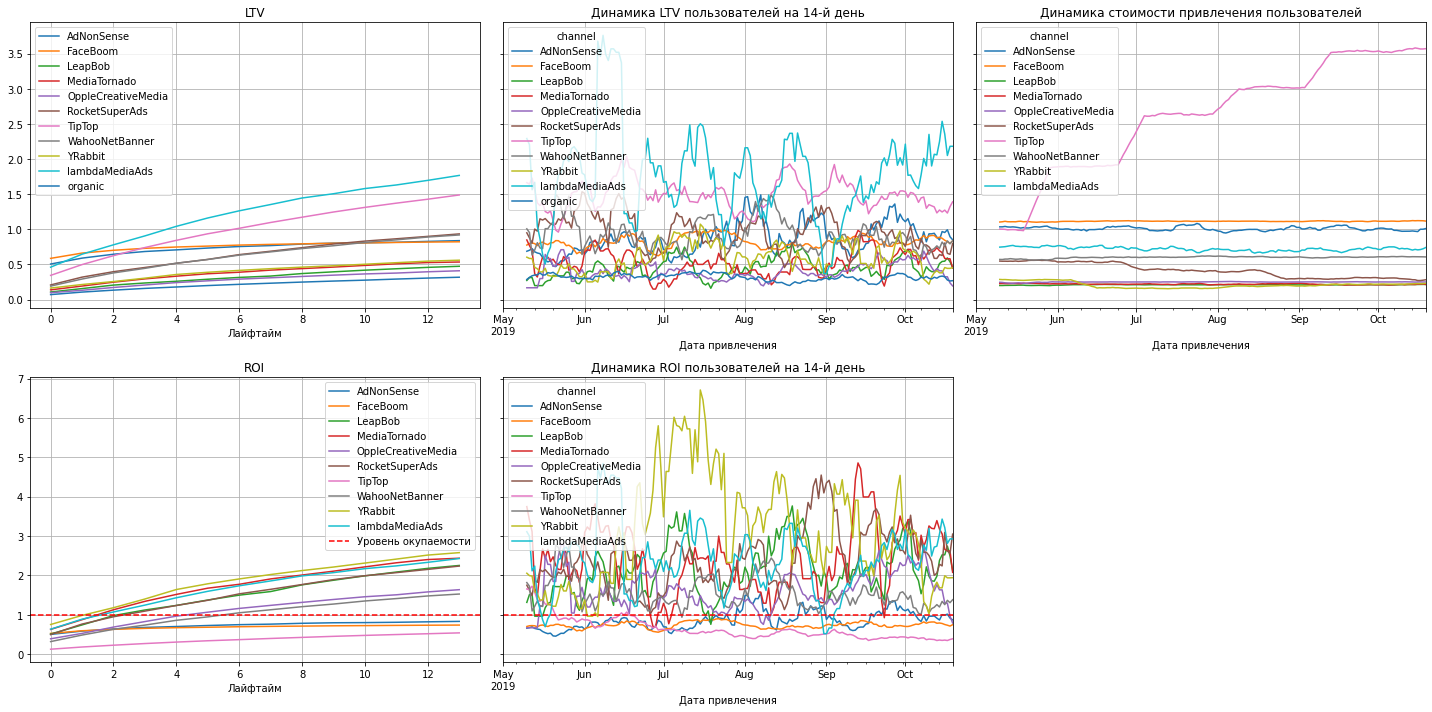

In [59]:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, 14, window=10)

**Топ-5 каналов продвижения:**
1. Yrabbit
2. MediaTornado
3. LamdaMediaAds
4. LeapBob
5. RocketSuperAds


**Антирейтинг каналов:**
1. TipTop
2. FaceBoom
3. AdNonSense
4. WahooNetBanner
5. OppleCreativeMedia

В антирейтинге последние 2 канала окупаются, но делают это не с самой оптимальной динамикой.

ТипТоп очередной раз демонстрирует непомерный аппетит, однако Yrabbit демонстрирует образец поведения - самый дешевый канал показывает великолепный результат.


### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Подводя итоги исследования, можно выделить следующие ключевые причины неэффективности привлечения пользователей:**

1. Слабая организация рекламной кампании и контроля ее текущих результатов на протяжении **ПОЛУГОДА**
2. Увеличение бюджета по неэффективным каналам привлечения аудитории
3. Слабая диверсификация рекламного бюджета по каналам продвижения в целом
4. Неверная оценка целевой аудитории (Вероятно ставка была сделана на американского пользователя на платформах Apple, при этом являющегося пользователем социальных сетей ТипТоп и ФэйсБум, то-есть опытного прожигателя времени. По крайней мере, такой вывод можно сделать из имеющихся данных)

В качестве рекомендации отделу маркетинга можно посоветовать следующее:

~~1. Уйти в отставку~~

1. Внедрить систему текущего/оперативного контроля эффективности рекламных показателей (дашбордиков красивых там наклепать например)
2. Диверсифицировать рекламный бюджет по каналам более оптимальным образом, обратить внимание на более перспективные каналы: Yrabbit, MediaTornado, LamdaMediaAds, LeapBob, RocketSuperAds.
3. Проводить корректировки рекламного бюджета ТОЛЬКО ПОСЛЕ АНАЛИЗА ЭФФЕКТИВНОСТИ КАНАЛА ПРОДВИЖЕНИЯ.
4. Несмотря на неудачную кампанию получена ценная информация - европейский рынок гораздо более перспективный, по сравнению с американским
5. Аналогичная ситуация и в разрезе устройств, но здесь рационально будет умеренно диверсифицировать, нежели устроить перекос в сторону одного из устройств.
6. Относительно удержания и конверсии - эти показатели неизбежно вырастут, если определить оптимальные каналы и скорректировать описание ЦА и сместить акцент на евопейские рынки.

